In [57]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import re

import seaborn

%matplotlib inline
plt.style.use('ggplot')

mpl.rcParams['figure.figsize'] = (12, 12)

In [58]:
#for fn in os.listdir('./data/kerneltestdata/uncleandata'):
#    with open('./data/kerneltestdata/uncleandata/'+fn, 'r') as fin:
#        data = fin.read().splitlines(True)
#    with open('./data/kerneltestdata/'+fn, 'w') as fout:
#        fout.writelines(data[1:])

In [59]:
bl = pd.read_csv('./data/kerneltestdata/bl2partv3.csv', sep = ',')
c128 = pd.read_csv('./data/kerneltestdata/sync128resultv3.csv', sep = ',')
c256 = pd.read_csv('./data/kerneltestdata/sync256resultv3.csv', sep = ',')
c384 = pd.read_csv('./data/kerneltestdata/sync384resultv3.csv', sep = ',')
c512 = pd.read_csv('./data/kerneltestdata/sync512resultv3.csv', sep = ',')
c768 = pd.read_csv('./data/kerneltestdata/sync768resultv3.csv', sep = ',')
#c896 = pd.read_csv('./data/kerneltestdata/result896.csv', sep = ',')
c896 = pd.read_csv('./data/kerneltestdata/sync896resultv3.csv', sep = ',')
c1024 = pd.read_csv('./data/kerneltestdata/sync1024resultv3.csv', sep = ',')

p1c128 = pd.read_csv('./data/kerneltestdata/1psync128result.csv', sep = ',')
p1c256 = pd.read_csv('./data/kerneltestdata/1psync256result.csv', sep = ',')
p1c384 = pd.read_csv('./data/kerneltestdata/1psync384result.csv', sep = ',')
p1c512 = pd.read_csv('./data/kerneltestdata/1psync512result.csv', sep = ',')
p1c768 = pd.read_csv('./data/kerneltestdata/1psync768result.csv', sep = ',')
p1c896 = pd.read_csv('./data/kerneltestdata/1psync896result.csv', sep = ',')
p1c1024 = pd.read_csv('./data/kerneltestdata/1psync1024result.csv', sep = ',')

nos128 = pd.read_csv('./data/kerneltestdata/nosync128resultv3.csv', sep = ',')
nos256 = pd.read_csv('./data/kerneltestdata/nosync256resultv3.csv', sep = ',')
nos384 = pd.read_csv('./data/kerneltestdata/nosync384resultv3.csv', sep = ',')
nos512 = pd.read_csv('./data/kerneltestdata/nosync512resultv3.csv', sep = ',')
nos768 = pd.read_csv('./data/kerneltestdata/nosync768resultv3.csv', sep = ',')
nos896 = pd.read_csv('./data/kerneltestdata/nosync896resultv3.csv', sep = ',')
nos1024 = pd.read_csv('./data/kerneltestdata/nosync1024resultv3.csv', sep = ',')

ss128 = pd.read_csv('./data/kerneltestdata/single128resultv3.csv', sep = ',')
ss256 = pd.read_csv('./data/kerneltestdata/single256resultv3.csv', sep = ',')
ss384 = pd.read_csv('./data/kerneltestdata/single384resultv3.csv', sep = ',')
ss512 = pd.read_csv('./data/kerneltestdata/single512resultv3.csv', sep = ',')
ss768 = pd.read_csv('./data/kerneltestdata/single768resultv3.csv', sep = ',')
ss896 = pd.read_csv('./data/kerneltestdata/single896resultv3.csv', sep = ',')
ss1024 = pd.read_csv('./data/kerneltestdata/single1024resultv3.csv', sep = ',')

In [60]:
frames1 = [c128,c256,c384,c512,c768,c896,c1024]
frames2 = [p1c128,p1c256,p1c384,p1c512,p1c768,p1c896,p1c1024]
frames3 = [nos128,nos256,nos384,nos512,nos768,nos896,nos1024]
frames4 = [ss128,ss256,ss384,ss512,ss768,ss896,ss1024]
dfsync = pd.concat(frames1, ignore_index=True)
dfp1 = pd.concat(frames2, ignore_index=True)
dfnosync = pd.concat(frames3, ignore_index=True)
dfsingle = pd.concat(frames4, ignore_index=True)
dfsync.columns = dfsync.columns.str.strip()
dfnosync.columns = dfnosync.columns.str.strip()
dfp1.columns = dfp1.columns.str.strip()
dfsingle.columns = dfsingle.columns.str.strip()

In [61]:
#dfsync[dfsync['#size']==1024]
#dfsingle[dfsingle['#size']==1024]


#dfp1.head()


In [62]:
dfsync['avgchunktime']=dfsync.HtDtime/dfsync['no_chunksHtD']
dfnosync['avgchunktime']=dfnosync.HtDtime/dfnosync['no_chunksHtD']
dfsingle['avgchunktime']=dfsingle.HtDtime/dfsingle['no_chunksHtD']
dfp1['avgchunktime']=dfp1.HtDtime/dfp1['no_chunksHtD']

dfsync['type']='synchronized streams'
dfnosync['type']='not synchronized streams'
dfsingle['type']='single stream'
dfp1['type']='single partition synched stream'

In [63]:
tempframes = [dfsync,dfnosync,dfp1,dfsingle]
dftemp=pd.concat(tempframes,ignore_index=True)
dftemp2 = dftemp.loc[dftemp['Kernel']=='partition 2']
dftemp2=dftemp2.append(dfp1)

In [64]:
#dftemp3['avgchunktimeDtH'].isnull()
#dftemp[(dftemp['type']=='single partition synched stream')]# & (dftemp['#size']==4096)]

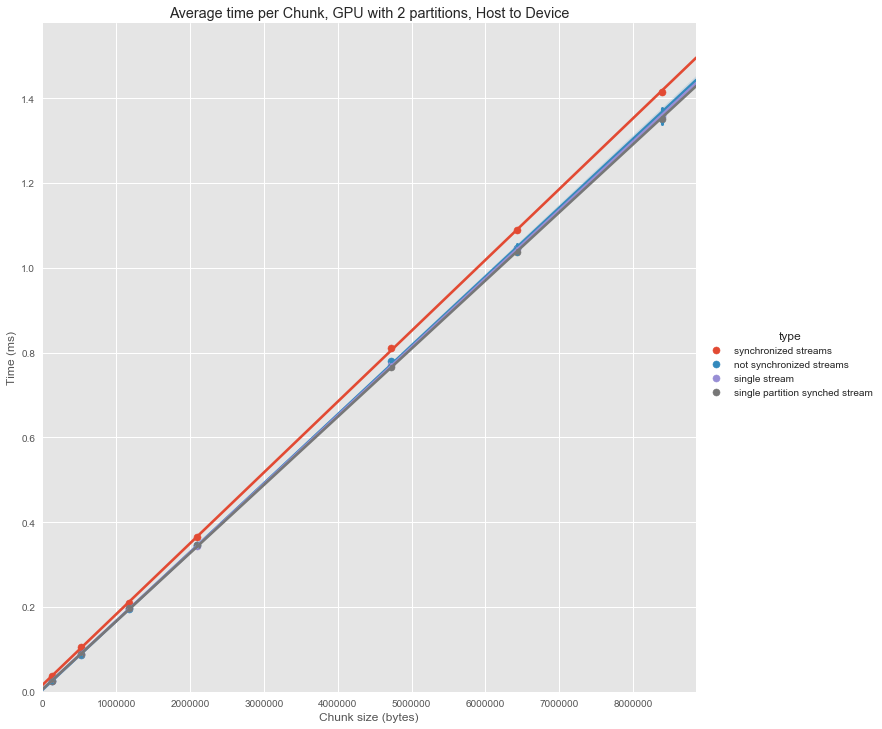

In [65]:


p=seaborn.lmplot(y='avgchunktime', x='chunksize',order=1,hue='type',data=dftemp2,size=10,x_estimator=np.mean)
plt.ylabel('Time (ms)')
plt.xlabel('Chunk size (bytes)')
plt.title('Average time per Chunk, GPU with 2 partitions, Host to Device')
p.set(ylim=(0, None),xlim=(0,None))

In [66]:
dfsync['avgchunktimeDtH']=dfsync.DtHtime/(dfsync['no_chunksDtH']-1)
dfnosync['avgchunktimeDtH']=dfnosync.DtHtime/(dfnosync['no_chunksDtH']-1)
dfp1['avgchunktimeDtH']=dfp1.DtHtime/(dfp1['no_chunksDtH'])

dfsinglep1 = dfsingle.loc[dfsingle['Kernel']=='partition 1']
dfsinglep2 = dfsingle.loc[dfsingle['Kernel']=='partition 2']



dfsinglep1['avgchunktimeDtH']=dfsinglep1.DtHtime/(dfsinglep1['no_chunksDtH'])
dfsinglep2['avgchunktimeDtH']=dfsinglep2.DtHtime/(dfsinglep2['no_chunksDtH']-1)

dfsinglet=pd.concat([dfsinglep1,dfsinglep2],ignore_index=True)


tempframes = [dfsync,dfnosync,dfp1,dfsinglet]
dftemp3=pd.concat(tempframes,ignore_index=True)

#dftemp[(dftemp['type']=='single partition synched stream')]


/Users/erikmelander/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/erikmelander/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


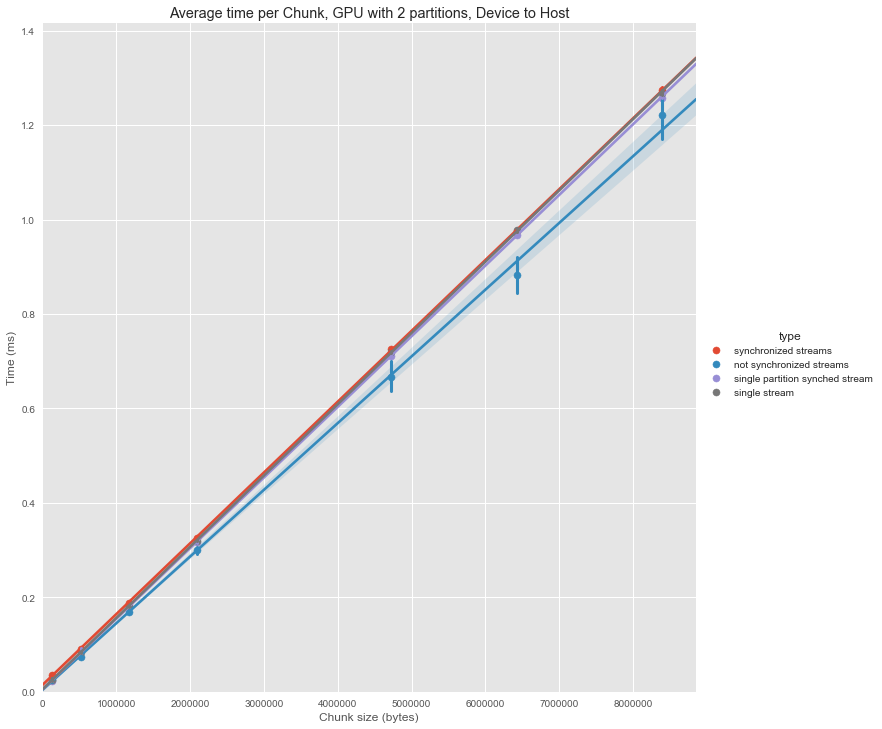

In [67]:

p=seaborn.lmplot(y='avgchunktimeDtH', x='chunksize',order=1,data=dftemp3,hue='type',size=10,x_estimator=np.mean)
plt.ylabel('Time (ms)') 
plt.xlabel('Chunk size (bytes)')
plt.title('Average time per Chunk, GPU with 2 partitions, Device to Host')
p.set(ylim=(0, None),xlim=(0,None))

In [68]:
syncfit = dfsync.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(syncfit['chunksize'],syncfit['avgchunktime'],1)
fsync=np.poly1d(r)
rco = np.corrcoef(syncfit['chunksize'],syncfit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2
t = r[0]*2097152+r[1]
print t,t*96
#syncfit[(syncfit['#size']==2048)]

[  1.67201602e-07   1.54534177e-02] 0.999313664537
0.366100592337 35.1456568643


In [69]:
fit = dfsingle.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(fit['chunksize'],fit['avgchunktime'],1)
fsingle=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2,fsingle

[  1.61586624e-07   5.27747312e-03] 0.999350775896  
1.616e-07 x + 0.005277


In [70]:
fit = dfp1.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(fit['chunksize'],fit['avgchunktime'],1)
f1p = np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2

[  1.60780941e-07   4.54775632e-03] 0.999781755785


In [71]:
fit = dftemp3[dftemp3['type']=='single stream']
r = np.polyfit(fit['chunksize'],fit['avgchunktimeDtH'],1)
fsingleDtH=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktimeDtH'])[0,1]
r2 = rco**2
print r,r2,fsingleDtH

fit = dftemp3[dftemp3['type']=='synchronized streams']
r = np.polyfit(fit['chunksize'],fit['avgchunktimeDtH'],1)
fsyncDtH=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktimeDtH'])[0,1]
r2 = rco**2
print r,r2,fsyncDtH

fit = dftemp3[dftemp3['type']=='single partition synched stream']
r = np.polyfit(fit['chunksize'],fit['avgchunktimeDtH'],1)
fp1DtH=np.poly1d(r)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktimeDtH'])[0,1]
r2 = rco**2
print r,r2,fp1DtH

# dfsync['type']='synchronized streams'
# dfnosync['type']='not synchronized streams'
# dfsingle['type']='single stream'
# dfp1['type']='single partition synched stream'

[  1.51015407e-07   4.80240368e-03] 0.997368174557  
1.51e-07 x + 0.004802
[  1.50093494e-07   1.38427943e-02] 0.992597399676  
1.501e-07 x + 0.01384
[  1.49708667e-07   4.38860566e-03] 0.99759971786  
1.497e-07 x + 0.004389
2.18879015022
2.05622760463


In [72]:
result = sm.OLS(dftemp2['chunksize'],dftemp2['avgchunktime']).fit()
#result.summary()

In [73]:
dftemp3=dftemp2[dftemp2['chunksize']<1100000]

In [74]:
meanandstd = pd.DataFrame()
for f in tempframes:
    for cs in f.chunksize.unique():
        t = np.mean(f[f['chunksize']==cs])


In [75]:
avg128=np.mean(dftemp[dftemp['chunksize']==131072])
stderr128=np.std(dftemp[dftemp['chunksize']==131072])
var128=np.var(dftemp[dftemp['chunksize']==131072])

print avg128['avgchunktime']
print stderr128['avgchunktime']
print var128['avgchunktime']

0.0282242089593
0.0105275949275
0.000110830254958


In [76]:
avg1024=np.mean(dftemp[dftemp['chunksize']==8388608])
stderr1024=np.std(dftemp[dftemp['chunksize']==8388608])
var1024=np.var(dftemp[dftemp['chunksize']==8388608])


print avg1024['avgchunktime']
print stderr1024['avgchunktime']
print var1024['avgchunktime']



1.34240582248
0.0917394349659
0.00841612392785


Model
-----

In [77]:
#if P1 matrix is larger than p2
def memtransfersync(m,n,k,c):
    t1 = m*f1p(c)+(n-1)*fsync(c)
    t2 = m*f1p(c)+(n)*fsync(c)+k*f1p(c)
    return (t1,t2)

def memtransfersyncreturn(m,n,k,c):
    t1 = m*fp1DtH(c)+(n-1)*fsyncDtH(c)
    t2 = m*fp1DtH(c)+n*fsyncDtH(c)+(k)*fp1DtH(c)
    return (t1,t2)

def memtransferstream(m,n,k,c):
    t1 = m*fsingle(c)+(n)*fsingle(c)
    t2 = m*fsingle(c)+n*fsingle(c)+k*fsingle(c)
    return (t1,t2)

def memtransferstreamreturn(m,n,k,c):
    t1 = m*fsingleDtH(c)+(n-1)*fsingleDtH(c)
    t2 = m*fsingleDtH(c)+n*fsingleDtH(c)+k*fsingleDtH(c)
    return (t1,t2)

#memtransfersync(3,6,3,2097152)
#print memtransfersync(0,24,0,2097152)
#print memtransferstream(0,24,0,2097152)

In [78]:
mtest512 = pd.read_csv('./data/kerneltestdata/modeltest512_1536v3.csv', sep = ',')
mtest620 = pd.read_csv('./data/kerneltestdata/modeltest620_1860v3.csv', sep = ',')
mtest920 = pd.read_csv('./data/kerneltestdata/modeltest960_2880v3.csv', sep = ',')
mtest = pd.concat([mtest512,mtest620,mtest920])
mtest.columns = mtest.columns.str.strip()
mtestk1 = mtest[mtest['Kernel']=='partition 1']
mtestk1 = mtestk1[['chunksize','HtDtime']]
mtest620.head()






,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime
0,1860,12869.712,0.814,77.764,79.840,3075200,83030400,27676800,54,18,partition 1,24.875521,46.635391,4.177600
1,1860,12869.712,0.814,77.764,79.840,3075200,83030400,27676800,54,18,partition 2,27.899649,46.645729,5.294176
2,1860,12869.712,0.521,77.858,79.933,3075200,83030400,27676800,54,18,partition 1,24.990305,46.623455,4.168768
3,1860,12869.712,0.521,77.858,79.933,3075200,83030400,27676800,54,18,partition 2,28.000160,46.644993,5.287488
4,1860,12869.712,0.536,77.903,79.977,3075200,83030400,27676800,54,18,partition 1,24.965183,46.665409,4.199296


(7.2355712393852336, 8.0692937259988504)
7.08269856 0.152872679385 2.11279350762
8.14256704 -0.0732733140012 -0.908051144118
(17.450974612916763, 19.52572434768615)
17.32027802 0.130696592917 0.748935780469
19.68495909 -0.159234742314 -0.815512600088
(25.269073288513159, 28.293611605329644)
25.02518949 0.243883798513 0.965147378887
28.30930136 -0.0156897546703 -0.0554533471697
(59.622255206213595, 66.820219991061919)
59.22210797 0.400147236214 0.671137371154
66.67391098 0.146309011062 0.218959187925


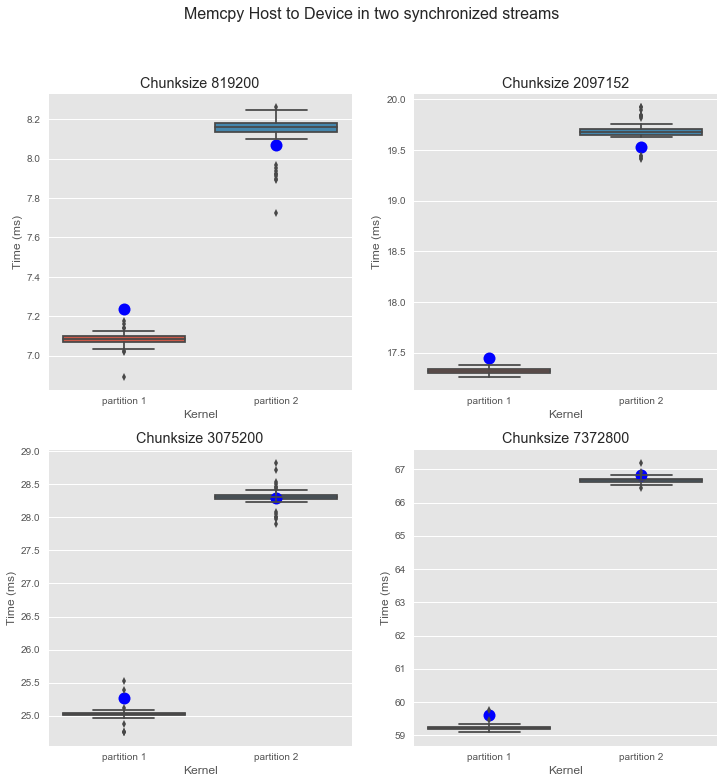

In [79]:
mtest = pd.read_csv('./data/kerneltestdata/modeltest320_960v3.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersync(5,44,5,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100




plt.subplot(221)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')




plt.subplot(222)

mtest = pd.read_csv('./data/kerneltestdata/modeltest512_1536v3.csv', sep = ',')
h = memtransfersync(5,44,5,2097152)
print h
mtest.columns = mtest.columns.str.strip()
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

mt=mtest
plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')
plt.subplot(223)


mtest = pd.read_csv('./data/kerneltestdata/modeltest620_1860v3.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()



mt = mtest #[mtest['Kernel']=='partition 1']
h = memtransfersync(5,44,5,3075200)
print h
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')
plt.subplot(224)


mtest = pd.read_csv('./data/kerneltestdata/modeltest960_2880v3.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

mt = mtest #[mtest['Kernel']=='partition 1']

h = memtransfersync(5,44,5,7372800)
print h
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
plt.suptitle('Memcpy Host to Device in two synchronized streams',fontsize=16)
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')
plt.title(title)

(1.4461765958822528, 2.345155654209985)
1.4164096 0.0297669958823 2.05832371835
2.29609376 0.04906189421 2.09205278643
(3.553160940709839, 5.7918752219137826)
3.51955232 0.0336086207098 0.945879493517
5.72776384 0.0641113819138 1.10691925253
(5.1656877214417687, 8.4297342179899761)
5.13723744 0.0284502814418 0.550754961894
8.38557792 0.04415629799 0.523816016592
(12.251224518075004, 20.020640616793564)
12.19869312 0.052531398075 0.428784877769
19.91949434 0.101146276794 0.505209991676


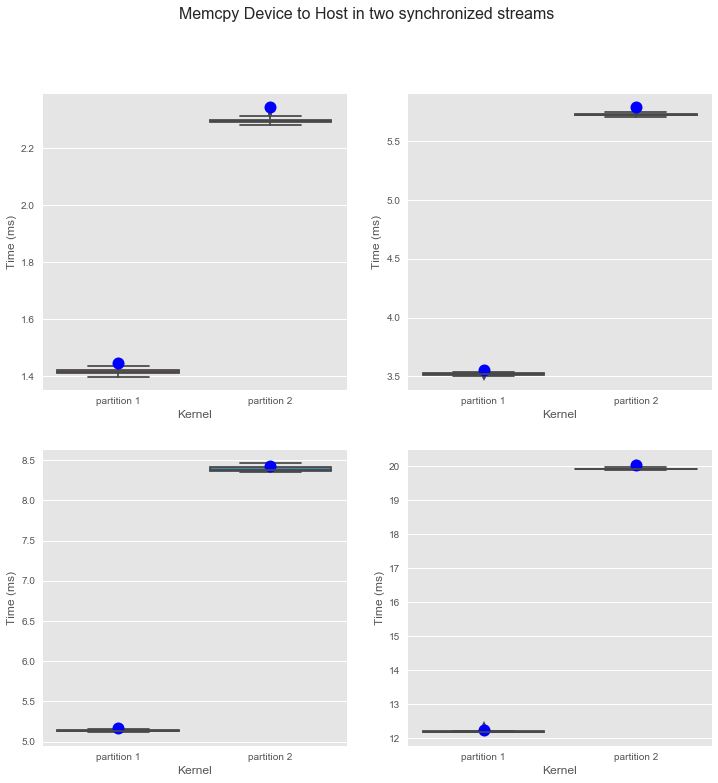

In [80]:
mtest = pd.read_csv('./data/kerneltestdata/modeltest960resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransfersyncreturn(6,6,6,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100

plt.subplot(221)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')




plt.subplot(222)

mtest = pd.read_csv('./data/kerneltestdata/modeltest1536resultv5.csv', sep = ',')
h = memtransfersyncreturn(6,6,6,2097152)
print h
mtest.columns = mtest.columns.str.strip()
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100

mt=mtest
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')


plt.subplot(223)


mtest = pd.read_csv('./data/kerneltestdata/modeltest1860resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()


h = memtransfersyncreturn(6,6,6,3075200)
print h
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100

mt = mtest #[mtest['Kernel']=='partition 1']
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')



plt.subplot(224)


mtest = pd.read_csv('./data/kerneltestdata/modeltest2880resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

mt = mtest #[mtest['Kernel']=='partition 1']

h = memtransfersyncreturn(6,6,6,7372800)
print h
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['DtHtime'].mean(), (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100
print mtp2['DtHtime'].mean(), (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100

#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
s= mt['chunksize'].unique()
plt.suptitle('Memcpy Device to Host in two synchronized streams',fontsize=16)
title = "Chunksize " + str(s[0])
plt.ylabel('Time (ms)')

(6.7448125243573891, 7.433058700312225)
6.87879232 -0.133979795643 -1.98641244896
7.42312 0.00993870031222 0.133709428553
(16.863310017361449, 18.584055937500374)
16.64553544 0.217774577361 1.29141062542
18.41460545 0.1694504875 0.911805733206
(24.607244246532527, 27.11818753699503)
24.45660001 0.150644236533 0.61219466521
27.15577297 -0.037585433005 -0.138598617454
(58.634543257711549, 64.617659916661708)
57.87869756 0.755845697712 1.28907919414
64.7468682 -0.129208283338 -0.199958159279


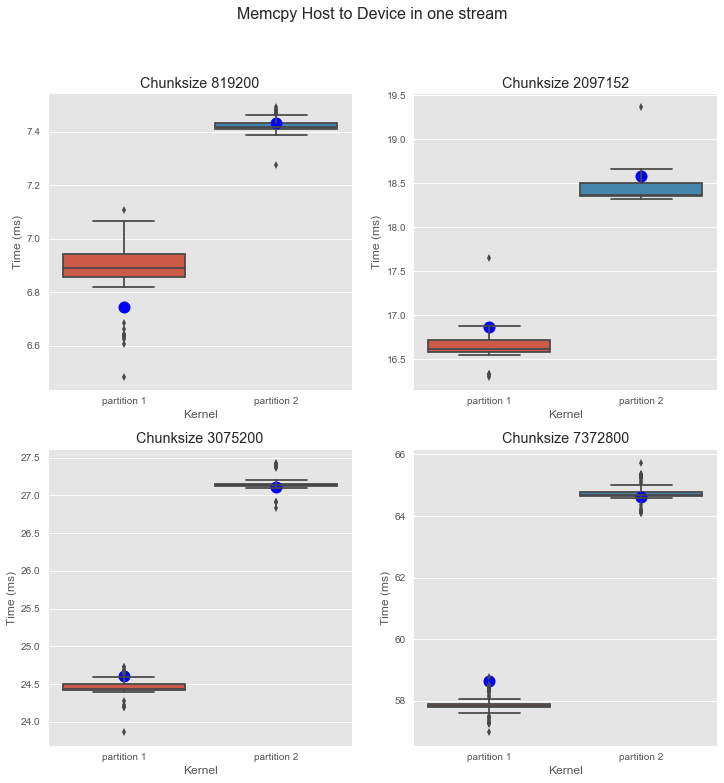

In [81]:
#mtest = pd.read_csv('./data/kerneltestdata/cpstmodel1960.csv', sep = ',')
mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream960resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,5,819200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.subplot(221)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream1536resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,5,2097152)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.subplot(222)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream1860resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,5,3075200)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.subplot(223)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream2880resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstream(5,44,5,7372800)
print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print mtp1['HtDtime'].mean(), (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100
print mtp2['HtDtime'].mean(), (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100

plt.subplot(224)

plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)



plt.suptitle('Memcpy Host to Device in one stream',fontsize=16)
s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

1.384 & 1.414 & 0.030 & 2.10
2.262 & 2.313 & 0.051 & 2.21
3.477 & 3.537 & 0.060 & 1.68
5.683 & 5.787 & 0.104 & 1.79
5.098 & 5.161 & 0.063 & 1.23
8.334 & 8.446 & 0.112 & 1.33
12.127 & 12.300 & 0.173 & 1.41
19.831 & 20.128 & 0.297 & 1.48


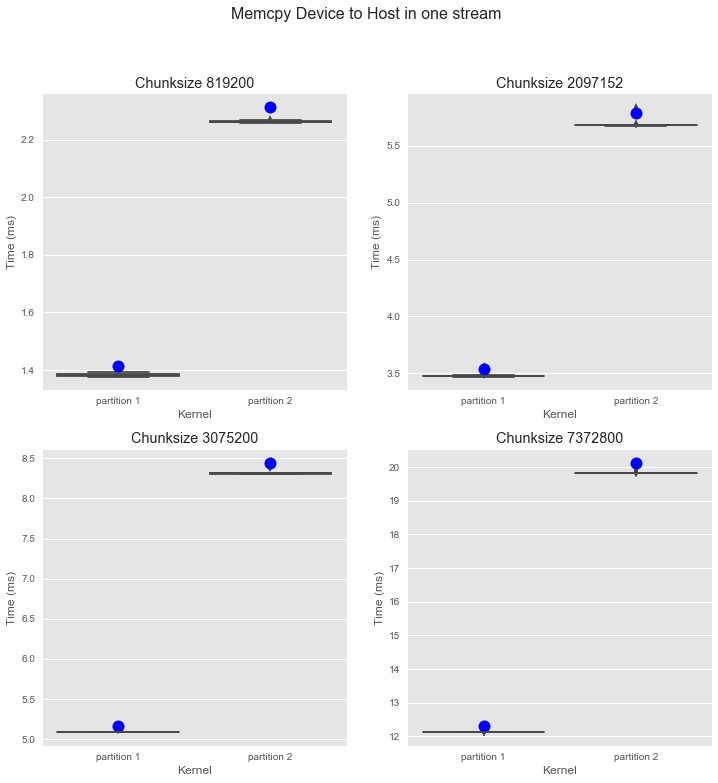

In [82]:
mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream960resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamreturn(6,6,6,819200)
#print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print "%.3f & %.3f & %.3f & %.2f" % (mtp1['DtHtime'].mean(),h[0], (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100)
print "%.3f & %.3f & %.3f & %.2f" % (mtp2['DtHtime'].mean(),h[1], (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100)

plt.subplot(221)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream1536resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamreturn(6,6,6,2097152)
#print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print "%.3f & %.3f & %.3f & %.2f" % (mtp1['DtHtime'].mean(),h[0], (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100)
print "%.3f & %.3f & %.3f & %.2f" % (mtp2['DtHtime'].mean(),h[1], (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100)

plt.subplot(222)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')


mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream1860resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamreturn(6,6,6,3075200)
#print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']
print "%.3f & %.3f & %.3f & %.2f" % (mtp1['DtHtime'].mean(),h[0], (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100)
print "%.3f & %.3f & %.3f & %.2f" % (mtp2['DtHtime'].mean(),h[1], (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100)

plt.subplot(223)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

mtest = pd.read_csv('./data/kerneltestdata/modeltestcpystream2880resultv5.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
#mt = mtest[mtest['Kernel']=='partition 1']
h = memtransferstreamreturn(6,6,6,7372800)
#print h
mt = mtest #[mtest['Kernel']=='partition 1']
mtp1=mtest[mtest['Kernel']=='partition 1']
mtp2=mtest[mtest['Kernel']=='partition 2']

print "%.3f & %.3f & %.3f & %.2f" % (mtp1['DtHtime'].mean(),h[0], (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100)
print "%.3f & %.3f & %.3f & %.2f" % (mtp2['DtHtime'].mean(),h[1], (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100)

plt.subplot(224)


#mt['HtDtime'].plot(kind = 'box')
seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')

s= mt['chunksize'].unique()
plt.suptitle('Memcpy Device to Host in one stream',fontsize=16)

title = "Chunksize " + str(s[0])
plt.title(title)
plt.ylabel('Time (ms)')

In [83]:
mtest.head()

,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime
0,2880,47775.744,0.808,234.090,237.941,7372800,199065600,66355200,54,18,partition 1,56.970848,161.146591,12.121216
1,2880,47775.744,0.808,234.090,237.941,7372800,199065600,66355200,54,18,partition 2,64.082848,161.124283,19.823521
2,2880,47775.744,0.411,235.070,238.921,7372800,199065600,66355200,54,18,partition 1,57.606495,161.493500,12.118688
3,2880,47775.744,0.411,235.070,238.921,7372800,199065600,66355200,54,18,partition 2,64.737411,161.257370,19.821377
4,2880,47775.744,0.588,235.611,239.462,7372800,199065600,66355200,54,18,partition 1,58.374241,161.266693,12.118272


Model 2 First partition 1 smaller
-------------------------------

In [84]:
#if P1 matrix is larger than p2
def memtransfersync(m,n,k,c):
    t1 = m*f1p(c)+(n-1)*fsync(c)
    t2 = m*f1p(c)+(n)*fsync(c)+k*f1p(c)
    return (t1,t2)

def memtransfersyncreturnm2(m,n,k,c):
    t1 = m*fp1DtH(c)+(n)*fsyncDtH(c)
    t2 = n*fsyncDtH(c)+(k)*fp1DtH(c)
    return (t1,t2)

def memtransferstream(m,n,k,c):
    t1 = m*fsingle(c)+(n)*fsingle(c)
    t2 = m*fsingle(c)+n*fsingle(c)+k*fsingle(c)
    return (t1,t2)

def memtransferstreamreturnm2(m,n,k,c):
    t1 = m*fsingleDtH(c)+(n)*fsingleDtH(c)
    t2 = n*fsingleDtH(c)+k*fsingleDtH(c)
    return (t1,t2)

#memtransfersync(3,6,3,2097152)
#print memtransfersync(0,24,0,2097152)
#print memtransferstream(0,24,0,2097152)

In [85]:
def printall(mtest,h,c):
    mt = mtest #[mtest['Kernel']=='partition 1']
    mtp1=mtest[mtest['Kernel']=='partition 1']
    mtp2=mtest[mtest['Kernel']=='partition 2']
    k1= "Kernel 1 size " + str(c) +" & "
    k2="Kernel 2 size " + str(c) +" & "
    print k1+"%.3f & %.3f & %.3f & %.2f" % (mtp1['HtDtime'].mean(),h[0], (h[0]-mtp1["HtDtime"].mean()),(h[0]-mtp1["HtDtime"].mean())/h[0]*100)+"\\\\ \hline"
    print k2+"%.3f & %.3f & %.3f & %.2f" % (mtp2['HtDtime'].mean(),h[1], (h[1]-mtp2["HtDtime"].mean()),(h[1]-mtp2["HtDtime"].mean())/h[1]*100)+"\\\\ \hline"


    plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
    plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
    #mt['HtDtime'].plot(kind = 'box')
    seaborn.boxplot(x='Kernel', y='HtDtime', data=mt)


    s= mt['chunksize'].unique()
    title = "Chunksize " + str(s[0])
    plt.title(title)
    plt.ylabel('Time (ms)')
    
def printallDtH(mtest,h,c):
    mt = mtest #[mtest['Kernel']=='partition 1']
    mtp1=mtest[mtest['Kernel']=='partition 1']
    mtp2=mtest[mtest['Kernel']=='partition 2']
    k1= "Kernel 1 size " + str(c) +" & "
    k2="Kernel 2 size " + str(c) +" & "
    print k1+"%.3f & %.3f & %.3f & %.2f" % (mtp1['DtHtime'].mean(),h[0], (h[0]-mtp1["DtHtime"].mean()),(h[0]-mtp1["DtHtime"].mean())/h[0]*100)+"\\\\ \hline"
    print k2+"%.3f & %.3f & %.3f & %.2f" % (mtp2['DtHtime'].mean(),h[1], (h[1]-mtp2["DtHtime"].mean()),(h[1]-mtp2["DtHtime"].mean())/h[1]*100)+"\\\\ \hline"


    plt.plot([0],[h[0]], marker = 'o',markersize=12, color='blue')
    plt.plot([1],[h[1]], marker = 'o',markersize=12, color='blue')
    #mt['HtDtime'].plot(kind = 'box')
    seaborn.boxplot(x='Kernel', y='DtHtime', data=mt)


    s= mt['chunksize'].unique()
    title = "Chunksize " + str(s[0])
    plt.title(title)
    plt.ylabel('Time (ms)')

Kernel 1 size 819200 & 6.875 & 6.745 & -0.130 & -1.93\\ \hline
Kernel 2 size 819200 & 10.235 & 10.324 & 0.088 & 0.86\\ \hline
Kernel 1 size 2097152 & 16.704 & 16.863 & 0.159 & 0.95\\ \hline
Kernel 2 size 2097152 & 25.645 & 25.811 & 0.166 & 0.64\\ \hline
Kernel 1 size 3075200 & 24.378 & 24.607 & 0.229 & 0.93\\ \hline
Kernel 2 size 3075200 & 37.525 & 37.664 & 0.139 & 0.37\\ \hline
Kernel 1 size 7372800 & 58.130 & 58.635 & 0.505 & 0.86\\ \hline
Kernel 2 size 7372800 & 90.129 & 89.747 & -0.382 & -0.43\\ \hline


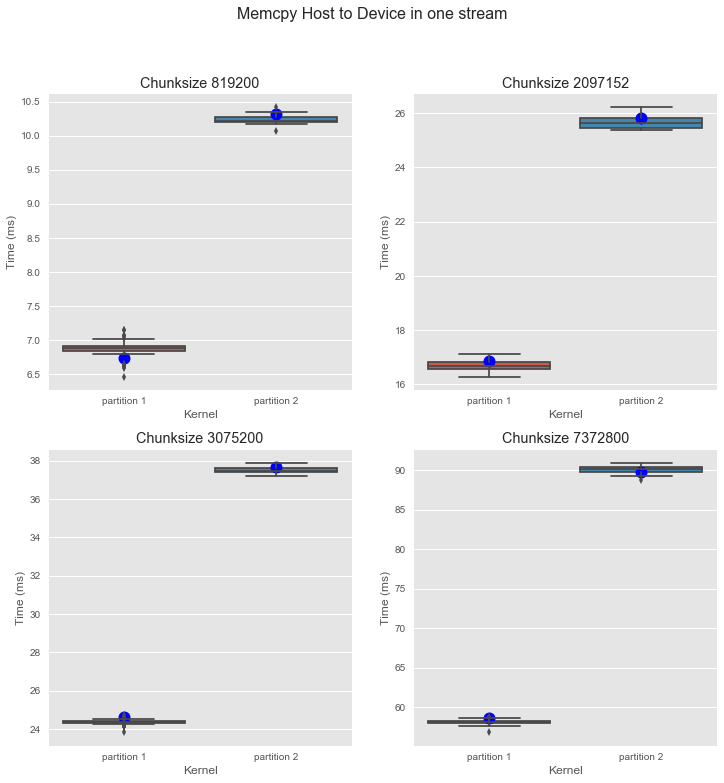

In [86]:
mtest = pd.read_csv('./data/kerneltestdata/model2stream_960result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()


#mt = mtest[mtest['Kernel']=='partition 1']
plt.subplot(221)
h = memtransferstream(5,44,26,819200)
printall(mtest,h,819200)



mtest = pd.read_csv('./data/kerneltestdata/model2stream_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransferstream(5,44,26,2097152)


printall(mtest,h,2097152)



mtest = pd.read_csv('./data/kerneltestdata/model2stream_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransferstream(5,44,26,3075200)


printall(mtest,h,3075200)


mtest = pd.read_csv('./data/kerneltestdata/model2stream_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.subplot(224)
h = memtransferstream(5,44,26,7372800)


printall(mtest,h,7372800)



plt.suptitle('Memcpy Host to Device in one stream',fontsize=16)




Kernel 1 size 819200 & 7.080 & 7.236 & 0.156 & 2.15\\ \hline
Kernel 2 size 819200 & 10.996 & 10.931 & -0.066 & -0.60\\ \hline
Kernel 1 size 2097152 & 17.138 & 17.451 & 0.313 & 1.79\\ \hline
Kernel 2 size 2097152 & 26.657 & 26.702 & 0.045 & 0.17\\ \hline
Kernel 1 size 2097152 & 25.044 & 25.269 & 0.225 & 0.89\\ \hline
Kernel 2 size 2097152 & 38.860 & 38.772 & -0.088 & -0.23\\ \hline
Kernel 1 size 2097152 & 59.256 & 59.622 & 0.367 & 0.61\\ \hline
Kernel 2 size 2097152 & 91.862 & 91.809 & -0.052 & -0.06\\ \hline


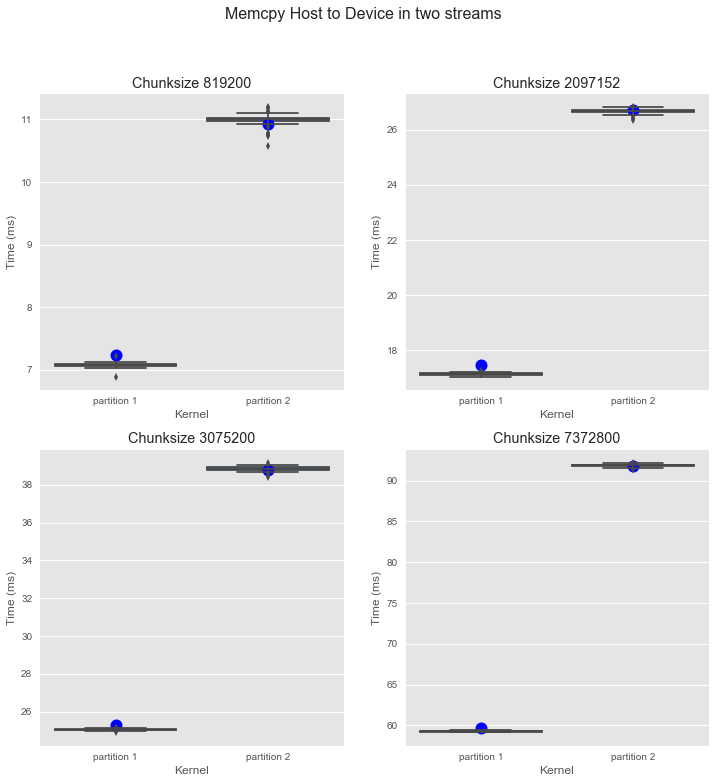

In [87]:
mtest = pd.read_csv('./data/kerneltestdata/model2sync_960result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransfersync(5,44,26,819200)
printall(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model2sync_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransfersync(5,44,26,2097152)
printall(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model2sync_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransfersync(5,44,26,3075200)
printall(mtest,h,2097152)

mtest = pd.read_csv('./data/kerneltestdata/model2sync_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransfersync(5,44,26,7372800)
printall(mtest,h,2097152)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Host to Device in two streams',fontsize=16)


Kernel 1 size 819200 & 1.156 & 1.143 & -0.012 & -1.08\\ \hline
Kernel 2 size 819200 & 2.019 & 2.032 & 0.014 & 0.67\\ \hline
Kernel 1 size 2097152 & 2.876 & 2.865 & -0.011 & -0.38\\ \hline
Kernel 2 size 2097152 & 5.081 & 5.094 & 0.012 & 0.24\\ \hline
Kernel 1 size 2097152 & 4.193 & 4.183 & -0.010 & -0.24\\ \hline
Kernel 2 size 2097152 & 7.444 & 7.436 & -0.008 & -0.11\\ \hline
Kernel 1 size 2097152 & 9.972 & 9.973 & 0.002 & 0.02\\ \hline
Kernel 2 size 2097152 & 17.684 & 17.731 & 0.046 & 0.26\\ \hline


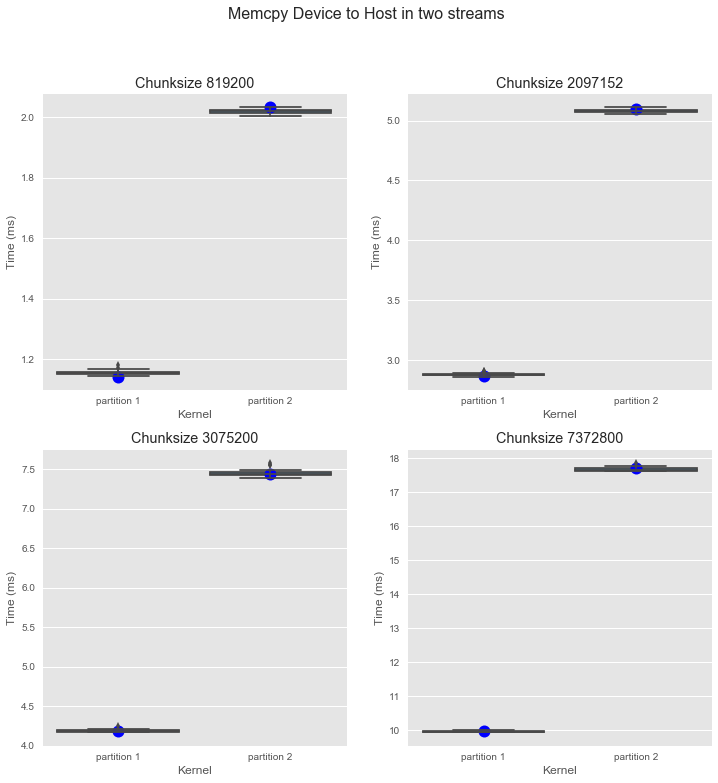

In [88]:
mtest = pd.read_csv('./data/kerneltestdata/model2sync_960result.csv', sep = ',')

mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransfersyncreturnm2(9,0,16,819200)
printallDtH(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model2sync_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransfersyncreturnm2(9,0,16,2097152)
printallDtH(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model2sync_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransfersyncreturnm2(9,0,16,3075200)
printallDtH(mtest,h,2097152)

mtest = pd.read_csv('./data/kerneltestdata/model2sync_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransfersyncreturnm2(9,0,16,7372800)
printallDtH(mtest,h,2097152)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Device to Host in two streams',fontsize=16)

Kernel 1 size 819200 & 1.155 & 1.157 & 0.002 & 0.13\\ \hline
Kernel 2 size 819200 & 2.019 & 2.056 & 0.037 & 1.79\\ \hline
Kernel 1 size 2097152 & 2.864 & 2.894 & 0.030 & 1.03\\ \hline
Kernel 2 size 2097152 & 5.057 & 5.144 & 0.087 & 1.69\\ \hline
Kernel 1 size 3075200 & 4.177 & 4.223 & 0.046 & 1.09\\ \hline
Kernel 2 size 3075200 & 7.387 & 7.507 & 0.120 & 1.60\\ \hline
Kernel 1 size 7372800 & 9.977 & 10.064 & 0.087 & 0.86\\ \hline
Kernel 2 size 7372800 & 17.661 & 17.891 & 0.230 & 1.29\\ \hline


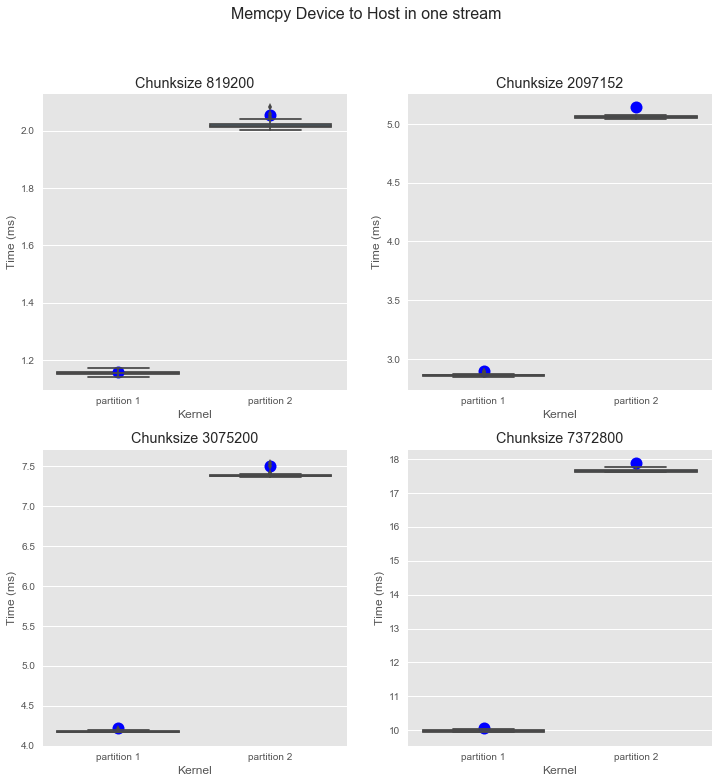

In [89]:
mtest = pd.read_csv('./data/kerneltestdata/model2stream_960result.csv', sep = ',')

mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransferstreamreturnm2(9,0,16,819200)
printallDtH(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model2stream_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransferstreamreturnm2(9,0,16,2097152)
printallDtH(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model2stream_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransferstreamreturnm2(9,0,16,3075200)
printallDtH(mtest,h,3075200)

mtest = pd.read_csv('./data/kerneltestdata/model2stream_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransferstreamreturnm2(9,0,16,7372800)
printallDtH(mtest,h,7372800)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Device to Host in one stream',fontsize=16)

model 3 partition 1 bigger than 2
---------------------------------

In [110]:
#if P1 matrix is larger than p2
def memtransfersyncm3(m,n,k,c):
    t1 = m*f1p(c)+n*fsync(c)+k*f1p(c)
    t2 = m*f1p(c)+(n)*fsync(c)
    return (t1,t2)

def memtransfersyncreturnm3(m,n,k,c):
    t1 = m*fp1DtH(c)+n*fsyncDtH(c)
    t2 = n*fsyncDtH(c)+k*fp1DtH(c)
    return (t1,t2)

def memtransferstreamm3(m,n,k,c):
    t1 = m*fsingle(c)+(n)*fsingle(c)+k*fsingle(c)
    t2 = m*fsingle(c)+n*fsingle(c)
    return (t1,t2)

def memtransferstreamreturnm3(m,n,k,c):
    t1 = m*fsingleDtH(c)+(n)*fsingleDtH(c)
    t2 = (n)*fsingleDtH(c)+k*fsingleDtH(c)
    return (t1,t2)

#memtransfersync(3,6,3,2097152)
#print memtransfersync(0,24,0,2097152)
#print memtransferstream(0,24,0,2097152)

Kernel 1 size 819200 & 11.114 & 11.092 & -0.021 & -0.19\\ \hline
Kernel 2 size 819200 & 8.692 & 8.912 & 0.220 & 2.47\\ \hline
Kernel 1 size 2097152 & 26.839 & 26.946 & 0.107 & 0.40\\ \hline
Kernel 2 size 2097152 & 21.073 & 21.478 & 0.405 & 1.89\\ \hline
Kernel 1 size 2097152 & 39.060 & 39.079 & 0.019 & 0.05\\ \hline
Kernel 2 size 2097152 & 30.771 & 31.095 & 0.324 & 1.04\\ \hline
Kernel 1 size 2097152 & 92.308 & 92.392 & 0.084 & 0.09\\ \hline
Kernel 2 size 2097152 & 72.849 & 73.352 & 0.504 & 0.69\\ \hline


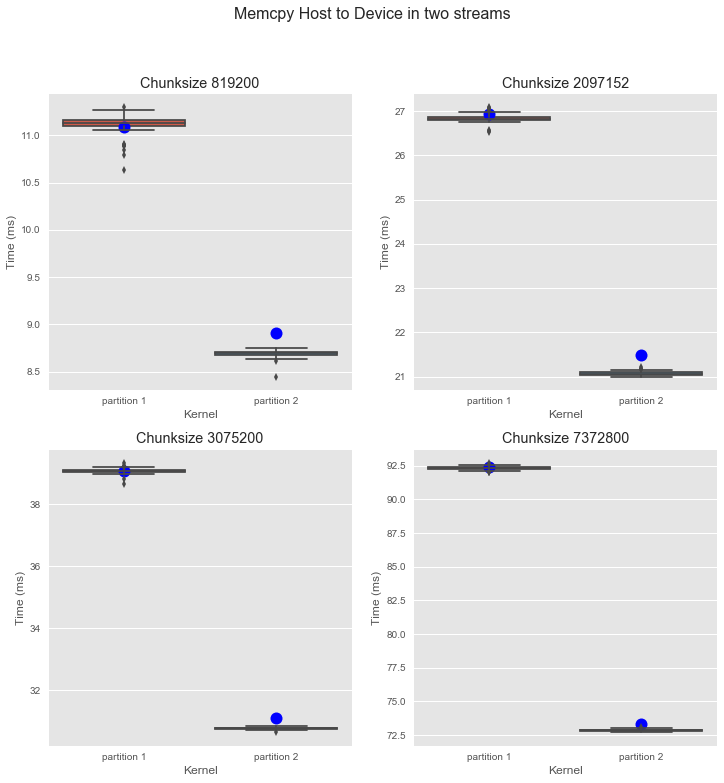

In [111]:
mtest = pd.read_csv('./data/kerneltestdata/model3sync_960result.csv', sep = ',')

mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransfersyncm3(5,54,16,819200)
printall(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model3sync_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransfersyncm3(5,54,16,2097152)
printall(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model3sync_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransfersyncm3(5,54,16,3075200)
printall(mtest,h,2097152)

mtest = pd.read_csv('./data/kerneltestdata/model3sync_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransfersyncm3(5,54,16,7372800)
printall(mtest,h,2097152)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Host to Device in two streams',fontsize=16)


Kernel 1 size 819200 & 10.213 & 10.324 & 0.111 & 1.07\\ \hline
Kernel 2 size 819200 & 8.337 & 8.121 & -0.216 & -2.66\\ \hline
Kernel 1 size 2097152 & 25.848 & 25.811 & -0.036 & -0.14\\ \hline
Kernel 2 size 2097152 & 20.633 & 20.305 & -0.328 & -1.62\\ \hline
Kernel 1 size 2097152 & 37.548 & 37.664 & 0.116 & 0.31\\ \hline
Kernel 2 size 2097152 & 29.899 & 29.629 & -0.270 & -0.91\\ \hline
Kernel 1 size 2097152 & 90.821 & 89.747 & -1.074 & -1.20\\ \hline
Kernel 2 size 2097152 & 71.887 & 70.601 & -1.287 & -1.82\\ \hline


,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime
0,3840,47775.744,0.800,365.422,488.140,7372800,353894400,117964800,48,16,partition 1,89.950333,380.459412,17.729856
1,2880,47775.744,0.800,365.422,488.140,7372800,199065600,66355200,27,9,partition 2,71.180962,161.509689,10.014560
2,3840,47775.744,0.545,366.548,489.875,7372800,353894400,117964800,48,16,partition 1,90.859169,381.284851,17.731264
3,2880,47775.744,0.545,366.548,489.875,7372800,199065600,66355200,27,9,partition 2,71.717567,161.499878,10.002400
4,3840,47775.744,0.552,366.417,489.318,7372800,353894400,117964800,48,16,partition 1,90.666016,380.919159,17.733088


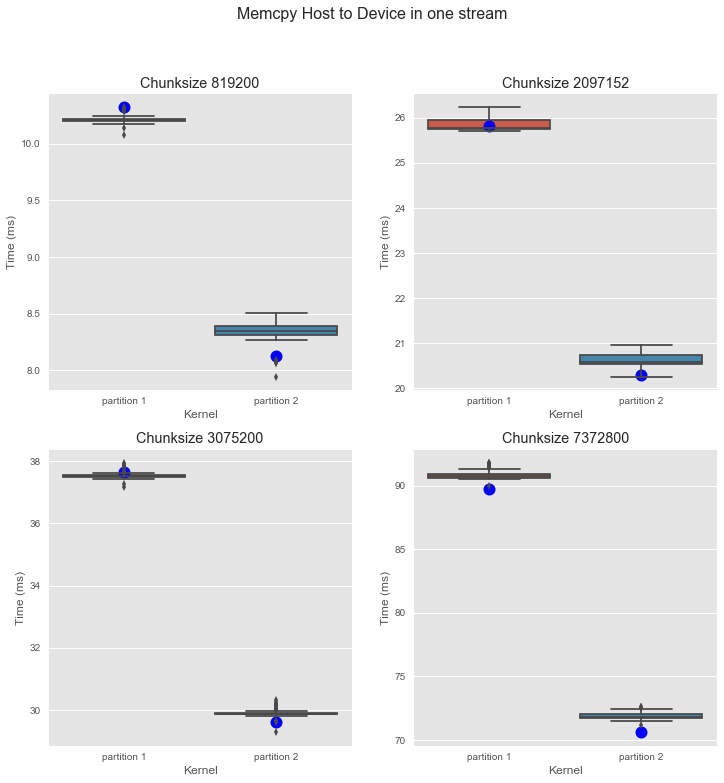

In [116]:
mtest = pd.read_csv('./data/kerneltestdata/model3stream_960result.csv', sep = ',')

mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransferstreamm3(5,54,16,819200)
printall(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model3stream_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransferstreamm3(5,54,16,2097152)
printall(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model3stream_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransferstreamm3(5,54,16,3075200)
printall(mtest,h,2097152)

mtest = pd.read_csv('./data/kerneltestdata/model3stream_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransferstreamm3(5,54,16,7372800)
printall(mtest,h,2097152)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Host to Device in one stream',fontsize=16)

Kernel 1 size 819200 & 2.022 & 2.032 & 0.010 & 0.51\\ \hline
Kernel 2 size 819200 & 1.154 & 1.143 & -0.011 & -0.98\\ \hline
Kernel 1 size 2097152 & 5.073 & 5.094 & 0.020 & 0.40\\ \hline
Kernel 2 size 2097152 & 2.877 & 2.865 & -0.012 & -0.42\\ \hline
Kernel 1 size 3075200 & 7.466 & 7.436 & -0.030 & -0.40\\ \hline
Kernel 2 size 3075200 & 4.202 & 4.183 & -0.019 & -0.45\\ \hline
Kernel 1 size 7372800 & 17.662 & 17.731 & 0.069 & 0.39\\ \hline
Kernel 2 size 7372800 & 9.978 & 9.973 & -0.004 & -0.04\\ \hline
2.18879015022
2.05622760463


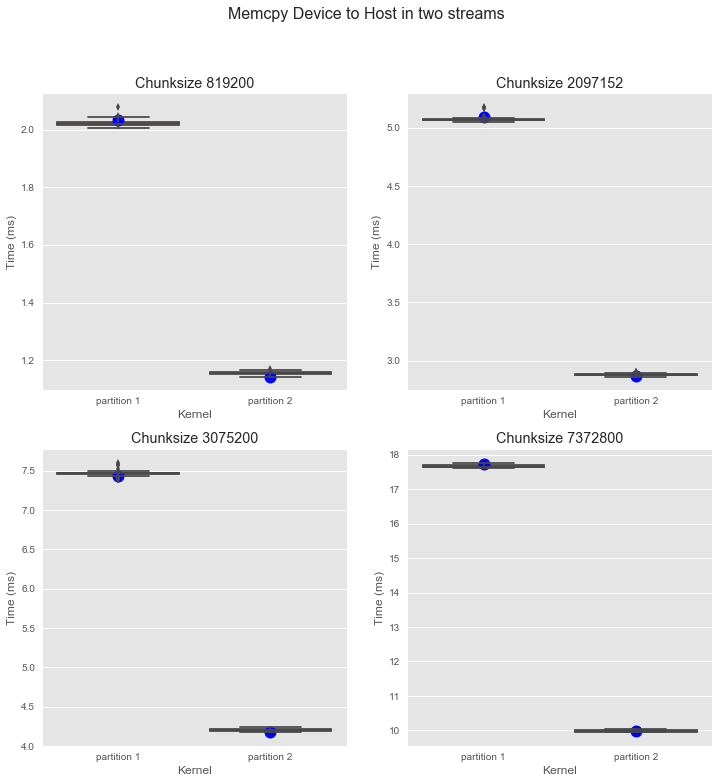

In [113]:
mtest = pd.read_csv('./data/kerneltestdata/model3sync_960result.csv', sep = ',')

mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransfersyncreturnm3(16,0,9,819200)
printallDtH(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model3sync_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransfersyncreturnm3(16,0,9,2097152)
printallDtH(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model3sync_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransfersyncreturnm3(16,0,9,3075200)
printallDtH(mtest,h,3075200)

mtest = pd.read_csv('./data/kerneltestdata/model3sync_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransfersyncreturnm3(16,0,9,7372800)
printallDtH(mtest,h,7372800)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Device to Host in two streams',fontsize=16)

Kernel 1 size 819200 & 2.015 & 2.056 & 0.041 & 2.02\\ \hline
Kernel 2 size 819200 & 1.151 & 1.157 & 0.005 & 0.47\\ \hline
Kernel 1 size 2097152 & 5.075 & 5.144 & 0.069 & 1.34\\ \hline
Kernel 2 size 2097152 & 2.873 & 2.894 & 0.021 & 0.72\\ \hline
Kernel 1 size 3075200 & 7.426 & 7.507 & 0.081 & 1.08\\ \hline
Kernel 2 size 3075200 & 4.195 & 4.223 & 0.028 & 0.66\\ \hline
Kernel 1 size 7372800 & 17.696 & 17.891 & 0.196 & 1.09\\ \hline
Kernel 2 size 7372800 & 9.976 & 10.064 & 0.088 & 0.87\\ \hline


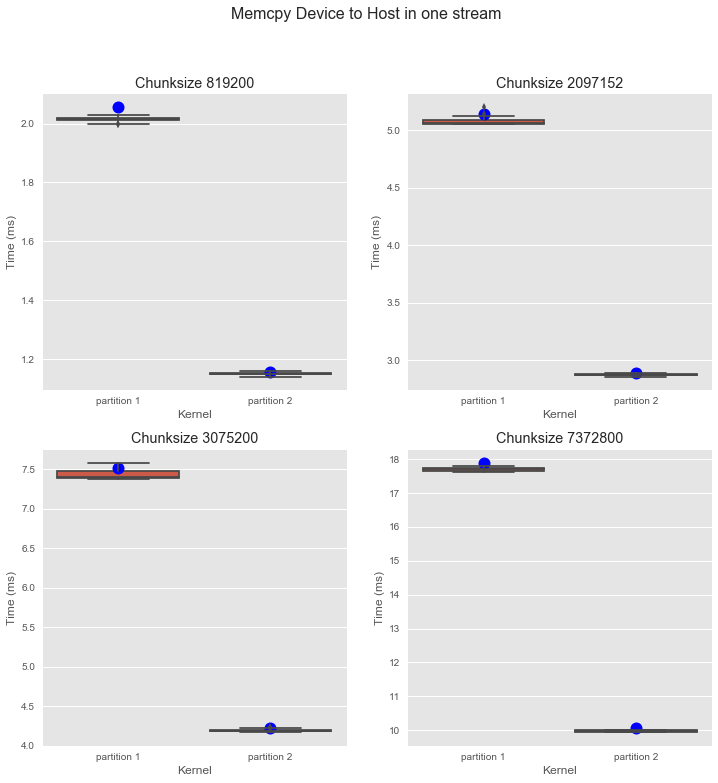

In [114]:
mtest = pd.read_csv('./data/kerneltestdata/model3stream_960result.csv', sep = ',')

mtest.columns = mtest.columns.str.strip()
plt.figure()

plt.subplot(221)
h = memtransferstreamreturnm3(16,0,9,819200)
printallDtH(mtest,h,819200)

mtest = pd.read_csv('./data/kerneltestdata/model3stream_1536result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(222)
h = memtransferstreamreturnm3(16,0,9,2097152)
printallDtH(mtest,h,2097152)


mtest = pd.read_csv('./data/kerneltestdata/model3stream_1860result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(223)
h = memtransferstreamreturnm3(16,0,9,3075200)
printallDtH(mtest,h,3075200)

mtest = pd.read_csv('./data/kerneltestdata/model3stream_2880result.csv', sep = ',')
mtest.columns = mtest.columns.str.strip()

plt.subplot(224)
h = memtransferstreamreturnm3(16,0,9,7372800)
printallDtH(mtest,h,7372800)
#mt = mtest[mtest['Kernel']=='partition 1']

plt.suptitle('Memcpy Device to Host in one stream',fontsize=16)

In [115]:
# mtest = pd.read_csv('./data/kerneltestdata/modeltest620_1860.csv', sep = ',')
# mtest.columns = mtest.columns.str.strip()

# mt = mtest #[mtest['Kernel']=='partition 1']
# mtestp1=np.mean(mt)
# stderrmtestp1=np.std(mt)
# varmtestp1=np.var(mt)
# h = memtransfersync(6,42,6,3075200)

# #mt['HtDtime'].plot(kind = 'box')
# mt.boxplot(column='HtDtime',by='Kernel')
# plt.plot([1],[h[0]], marker = 'o',markersize=12, color='blue')
# plt.plot([2],[h[1]], marker = 'o',markersize=12, color='blue')


# mt = mtest[mtest['Kernel']=='partition 2']
# mtestp2=np.mean(mt)
# stderrmtestp2=np.std(mt)
# varmtestp2=np.var(mt)
# print mtestp1['HtDtime']
# print stderrmtestp1['HtDtime']
# print varmtestp1['HtDtime']



# print mtestp2['HtDtime']
# print stderrmtestp2['HtDtime']
# print varmtestp2['HtDtime']
# h = memtransfersync(6,42,6,3075200)
# print h
# print memtransfersyncreturn(6,6,6,3075200)


In [96]:
# mtest = pd.read_csv('./data/kerneltestdata/modeltest960_2880.csv', sep = ',')
# mtest.columns = mtest.columns.str.strip()

# mt = mtest[mtest['Kernel']=='partition 1']
# mtestp1=np.mean(mt)
# stderrmtestp1=np.std(mt)
# varmtestp1=np.var(mt)
# h = memtransfersync(6,42,6,7372800)
# print h
# mt['HtDtime'].plot(kind = 'box')
# plt.plot([1],[h[0]], marker = 'o',markersize=12, color='blue')

# mt = mtest[mtest['Kernel']=='partition 2']
# mtestp2=np.mean(mt)
# stderrmtestp2=np.std(mt)
# varmtestp2=np.var(mt)
# print mtestp1['HtDtime']
# print stderrmtestp1['HtDtime']
# print varmtestp1['HtDtime']



# print mtestp2['HtDtime']
# print stderrmtestp2['HtDtime']
# print varmtestp2['HtDtime']
# h = memtransfersync(6,42,6,7372800)
# print h
# print memtransfersyncreturn(6,6,6,7372800)

In [97]:
# mtest = pd.read_csv('./data/kerneltestdata/modeltest320_960.csv', sep = ',')
# mtest.columns = mtest.columns.str.strip()

# mt = mtest[mtest['Kernel']=='partition 1']
# mtestp1=np.mean(mt)
# stderrmtestp1=np.std(mt)
# varmtestp1=np.var(mt)
# h = memtransfersync(6,42,6,819200)
# print h
# mt['HtDtime'].plot(kind = 'box')
# plt.plot([1],[h[0]], marker = 'o',markersize=12, color='blue')

# mt = mtest[mtest['Kernel']=='partition 2']
# mtestp2=np.mean(mt)
# stderrmtestp2=np.std(mt)
# varmtestp2=np.var(mt)
# print mtestp1['HtDtime']
# print stderrmtestp1['HtDtime']
# print varmtestp1['HtDtime']



# print mtestp2['HtDtime']
# print stderrmtestp2['HtDtime']
# print varmtestp2['HtDtime']
# h = memtransfersync(6,42,6,819200)
# print h
# print memtransfersyncreturn(6,6,6,819200)

In [98]:
# mtest = pd.read_csv('./data/kerneltestdata/modeltest512_1024.csv', sep = ',')
# mtest.columns = mtest.columns.str.strip()

# mt = mtest[mtest['Kernel']=='partition 1']
# mtestp1=np.mean(mt)
# stderrmtestp1=np.std(mt)
# varmtestp1=np.var(mt)
# h = memtransfersync(6,42,6,819200)
# print h
# mt['HtDtime'].plot(kind = 'box')
# plt.plot([1],[h[0]], marker = 'o',markersize=12, color='blue')

# mt = mtest[mtest['Kernel']=='partition 2']
# mtestp2=np.mean(mt)
# stderrmtestp2=np.std(mt)
# varmtestp2=np.var(mt)
# print mtestp1['HtDtime']
# print stderrmtestp1['HtDtime']
# print varmtestp1['HtDtime']



# print mtestp2['HtDtime']
# print stderrmtestp2['HtDtime']
# print varmtestp2['HtDtime']
# h = memtransfersync(6,42,6,819200)
# print h
# print memtransfersyncreturn(6,6,6,819200)

At this point we're going to calculate a normalized overhead using our baseline
--------------------------------------------------------------------------

In [117]:
bl.columns = bl.columns.str.strip()
bl.head()

,#size,mflops,magma_cputime,magma_gputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH
0,128,4.194,0.235,0.237,0.0,0.558,65536,393216,131072,0,0
1,192,14.156,0.134,0.136,0.0,0.512,65536,884736,294912,0,0
2,256,33.554,0.149,0.151,0.0,0.733,65536,1572864,524288,0,0
3,320,65.536,0.182,0.185,0.0,1.099,65536,2457600,819200,0,0
4,384,113.246,0.193,0.196,0.0,1.331,65536,3538944,1179648,0,0


In [100]:
# normalizeddf = dfsync.copy()
# normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
# #normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
# for s in normalizeddf.loc[:,('#size')].unique():
#     avg=bl['totaltime'][bl['#size']==s].mean()
#     normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 
# normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
# y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
# err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
# x=normalizeddf['#size'].unique()
# for s in y['chunksize'].unique():
#     yt=y[y['chunksize']==s]
#     et=err
#     plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
# plt.legend(y['#size'].unique(),title='Chunk side size')
# plt.xlabel('Matrix side size')
# plt.ylabel('Normalized time for all partitions to finish')
# plt.title('DGEMM kernel - Overhead of synchronized and interleved memcpy in 2 streams')
# plt.ylim(0.4,1.5)
# plt.xlim(0,5000)


In [101]:
# normalizeddf = dfsingle.copy()
# normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
# for s in normalizeddf.loc[:,('#size')].unique():
#     avg=bl['totaltime'][bl['#size']==s].mean()
#     normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

# normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
# y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
# err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
# x=normalizeddf['#size'].unique()
# for s in y['chunksize'].unique():
#     yt=y[y['chunksize']==s]
#     et=err
#     plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
# plt.legend(y['#size'].unique(),title='Chunk side size')
# plt.xlabel('Matrix side size')
# plt.ylabel('Normalized time for all partitions to finish')
# plt.title('DGEMM kernel - Overhead of interleved memcpy in a single stream')
# plt.ylim(0.4,1.5)
# plt.xlim(0,5000)

In [102]:
# normalizeddf = dfnosync.copy()
# normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
# for s in normalizeddf.loc[:,('#size')].unique():
#     avg=bl['totaltime'][bl['#size']==s].mean()
#     normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

# normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
# y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
# err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
# x=normalizeddf['#size'].unique()
# for s in y['chunksize'].unique():
#     yt=y[y['chunksize']==s]
#     et=err
#     plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
# plt.legend(y['#size'].unique(),title='Chunk side size')
# plt.xlabel('Matrix side size')
# plt.ylabel('Normalized time for all partitions to finish')
# plt.title('DGEMM kernel - Overhead of interleved memcpy in 2 streams without syncing')
# plt.ylim(0.4,1.5)
# plt.xlim(0,5000)

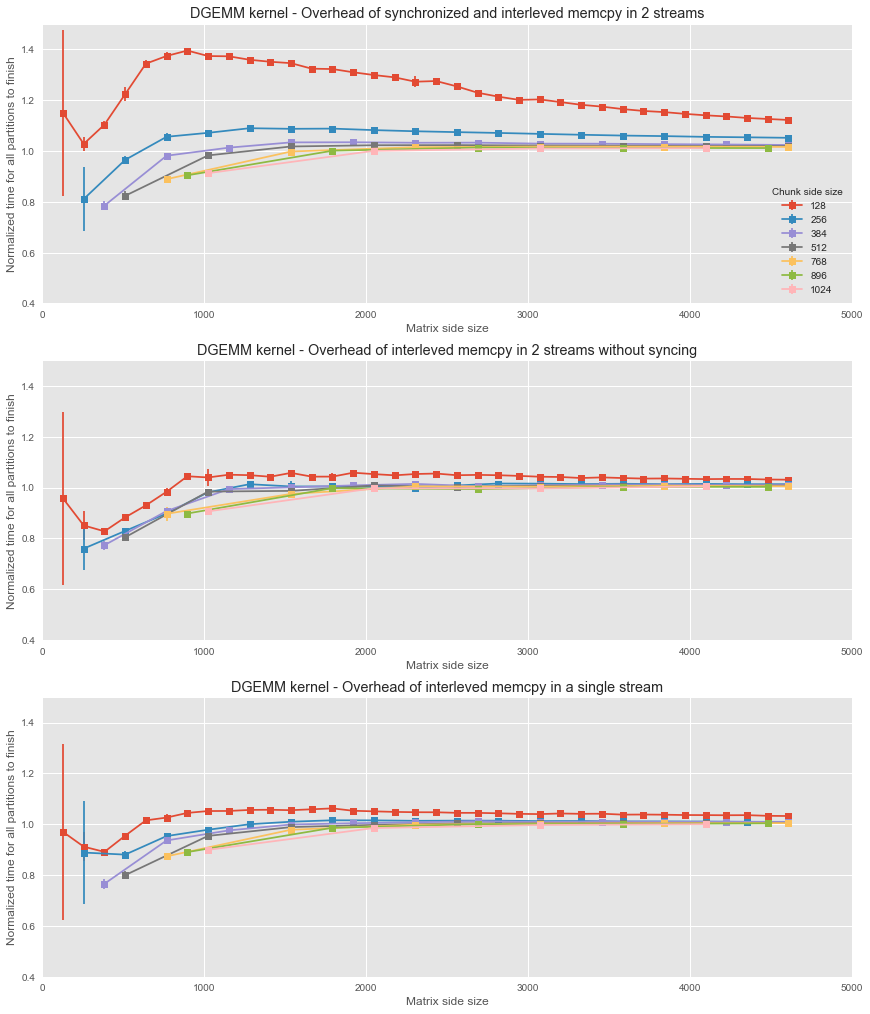

In [103]:
plt.figure(figsize=(12,14))
normalizeddf = dfsync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
#normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(311)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
plt.legend([128,256,384,512,768,896,1024],title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of synchronized and interleved memcpy in 2 streams')
plt.ylim(0.4,1.5)
plt.xlim(0,5000)

normalizeddf = dfnosync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(312)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
#plt.legend(y['#size'].unique(),title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of interleved memcpy in 2 streams without syncing')
plt.ylim(0.4,1.5)
plt.xlim(0,5000)

normalizeddf = dfsingle.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(313)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
#plt.legend(y['#size'].unique(),title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of interleved memcpy in a single stream')
plt.ylim(0.4,1.5)
plt.xlim(0,5000)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

ANTT
----

In [118]:
bl = pd.read_csv('./data/kerneltestdata/baseline12sm.csv', sep = ',')
bl.columns = bl.columns.str.strip()
bl.head()

,#size,mflops,magma_cputime,magma_gputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH
0,128,4.194,0.235,0.237,0.0,0.558,65536,393216,131072,0,0
1,192,14.156,0.134,0.136,0.0,0.512,65536,884736,294912,0,0
2,256,33.554,0.149,0.151,0.0,0.733,65536,1572864,524288,0,0
3,320,65.536,0.182,0.185,0.0,1.099,65536,2457600,819200,0,0
4,384,113.246,0.193,0.196,0.0,1.331,65536,3538944,1179648,0,0


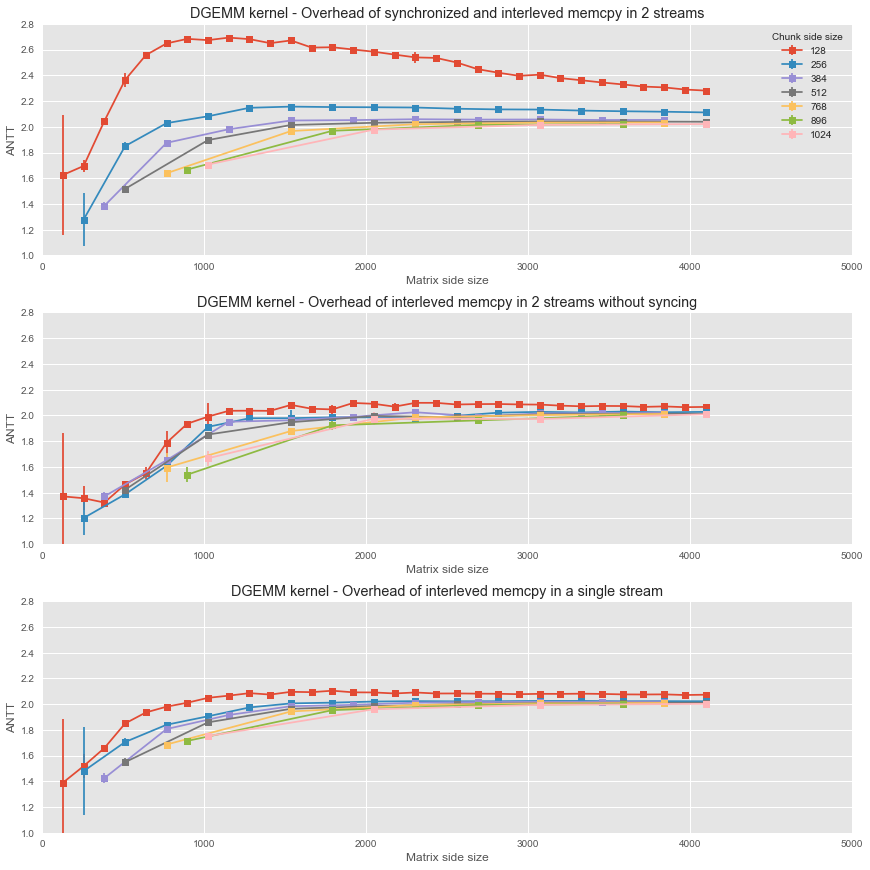

In [105]:
normalizeddf=dfsync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['#size']<=4096]
for s in normalizeddf.loc[:,('#size')].unique():
    t=bl[bl['#size']==s]['totaltime'].item()
    mask = normalizeddf['#size'] == s
    normalizeddf.loc[mask,'ANTT']=(normalizeddf[mask]['ATT']/t)
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['ANTT'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['ANTT'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(311)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['ANTT'],err[s],marker='s')
plt.legend([128,256,384,512,768,896,1024],title='Chunk side size')

plt.xlabel('Matrix side size')
plt.ylabel('ANTT')
plt.title('DGEMM kernel - Overhead of synchronized and interleved memcpy in 2 streams')
plt.ylim(1,2.8)

plt.xlim(0,5000)

normalizeddf=dfnosync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['#size']<=4096]
for s in normalizeddf.loc[:,('#size')].unique():
    t=bl[bl['#size']==s]['totaltime'].item()
    mask = normalizeddf['#size'] == s
    normalizeddf.loc[mask,'ANTT']=(normalizeddf[mask]['ATT']/t)
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['ANTT'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['ANTT'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(312)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['ANTT'],err[s],marker='s')
plt.xlabel('Matrix side size')
plt.ylabel('ANTT')
plt.title('DGEMM kernel - Overhead of interleved memcpy in 2 streams without syncing')
plt.ylim(1,2.8)

plt.xlim(0,5000)

normalizeddf=dfsingle.copy()
normalizeddf = normalizeddf.loc[normalizeddf['#size']<=4096]
for s in normalizeddf.loc[:,('#size')].unique():
    t=bl[bl['#size']==s]['totaltime'].item()
    mask = normalizeddf['#size'] == s
    normalizeddf.loc[mask,'ANTT']=(normalizeddf[mask]['ATT']/t)
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['ANTT'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['ANTT'].apply(np.std)
x=normalizeddf['#size'].unique()
plt.subplot(313)
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['ANTT'],err[s],marker='s')
plt.xlabel('Matrix side size')
plt.ylabel('ANTT')
plt.title('DGEMM kernel - Overhead of interleved memcpy in a single stream')
plt.ylim(1,2.8)
plt.xlim(0,5000)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)